In [1]:
#数据生成器生成训练集与测试集
from keras.preprocessing.image import ImageDataGenerator
IMSIZE=224
train_generator=ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    './data_vgg/train',
    target_size=(IMSIZE,IMSIZE),
    batch_size=100,
    class_mode='categorical')
validation_generator=ImageDataGenerator(
    rescale=1./255).flow_from_directory(
        './data_vgg/test',
        target_size=(IMSIZE,IMSIZE),
        batch_size=100,
        class_mode='categorical')

Found 8232 images belonging to 200 classes.
Found 3556 images belonging to 200 classes.


<Figure size 432x288 with 0 Axes>

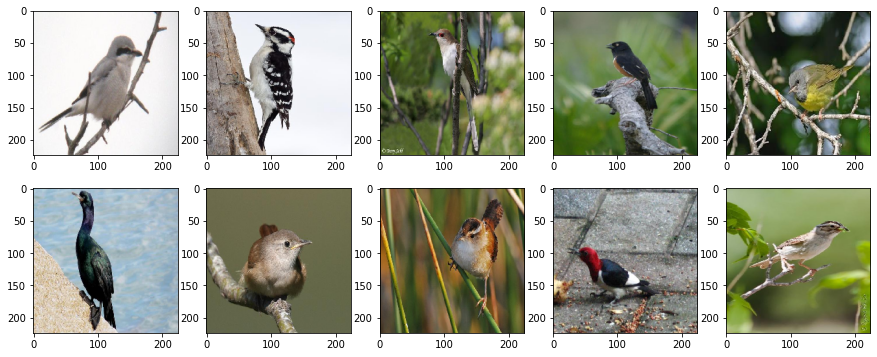

In [2]:
#图像展示
from matplotlib import pyplot as plt

plt.figure()
fig,ax=plt.subplots(2,5)
fig.set_figheight(6)
fig.set_figwidth(15)
ax=ax.flatten()
X,Y=next(validation_generator)
for i in range(10):
    ax[i].imshow(X[i,:,:,])


In [3]:
# import tensorflow as tf
# from tensorflow.keras import Sequential

# model=tf.keras.models.Sequential([
#     #BatchNormalization用来提高分类的准确率
#     #第一组卷积层（2次卷积）,由64个3*3的卷积核进行same卷积,激活函数为ReLU。
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),padding='same',activation='relu'),
#     #第一个池化层进行2*2的最大值池化，步长为2，输出为112*112*64
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
#     #第2组卷积层（2次卷积）,进行128个3*3的卷积核进行same卷积。
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding='same',activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding='same',activation='relu'),
#     #第2个池化层进行2*2的最大值池化，步长为2，输出为56*56*128
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
#     #第3组卷积层（3次卷积）,进行256个3*3的卷积核进行same卷积。
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'),
#     #第2个池化层进行2*2的最大值池化，步长为2，输出为28*28*256
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
#     #第4组卷积层（3次卷积）,进行512个3*3的卷积核进行same卷积。
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
#     #第2个池化层进行2*2的最大值池化，步长为2，输出为14*14*512
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
#     #第5组卷积层（3次卷积）,进行512个3*3的卷积核进行same卷积。
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=3)
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
#     #第2个池化层进行2*2的最大值池化，步长为2，输出为7*7*512
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(units=200,activation='softmax')
# ])
# model.summary()

import tensorflow as tf
from tensorflow.keras import Sequential

model=tf.keras.models.Sequential([
#     tf.keras.layers.BatchNormalization(axis=3)
    #BatchNormalization用来提高分类的准确率
    #第一组卷积层（2次卷积）,由64个3*3的卷积核进行same卷积,激活函数为ReLU。
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=200,activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      1

In [ ]:
# from keras.layers import Conv2D,MaxPooling2D
# from keras import Model
# from keras.layers import Flatten,Dense,Input,Activation
# from keras.layers import GlobalAveragePooling2D

# IMSIZE = 224
# input_shape = (IMSIZE,IMSIZE,3)
# input_layer = Input(input_shape)
# x = input_layer

# x = Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)

# x = Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)

# x = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)

# x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)

# x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)

# x = GlobalAveragePooling2D()(x)

# x = Dense(200)(x)
# x = Activation('softmax')(x)
# output_layer = x
# model_vgg16 = Model(input_layer,output_layer)
# model_vgg16.summary()


In [4]:
#模型的编译与拟合
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.fit_generator(train_generator,epochs=2,validation_data=validation_generator)

NameError: name 'train_generator' is not defined